# Intro to DL on the DevCloud

In [2]:
# Make sure we're running TensorFlow 1.9
!pip install --user tensorflow==1.13.0
#!pip install --user h5py

  Could not find a version that satisfies the requirement tensorflow==1.13.0 (from versions: 0.12.1, 1.0.0, 1.0.1, 1.1.0rc0, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.2.0rc0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.3.0rc0, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.4.0rc0, 1.4.0rc1, 1.4.0, 1.4.1, 1.5.0rc0, 1.5.0rc1, 1.5.0, 1.5.1, 1.6.0rc0, 1.6.0rc1, 1.6.0, 1.7.0rc0, 1.7.0rc1, 1.7.0, 1.7.1, 1.8.0rc0, 1.8.0rc1, 1.8.0, 1.9.0rc0, 1.9.0rc1, 1.9.0rc2, 1.9.0, 1.10.0rc0, 1.10.0rc1, 1.10.0, 1.10.1, 1.11.0rc0, 1.11.0rc1, 1.11.0rc2, 1.11.0, 1.12.0rc0, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.12.2, 1.13.0rc0, 1.13.0rc1, 1.13.0rc2, 1.13.1, 2.0.0a0)
No matching distribution found for tensorflow==1.13.0
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Python 3.6.3 :: Intel Corporation


In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from tensorflow.keras.models import load_model
#import h5py
print(tf.VERSION)
print(tf.__file__)
print(tf.keras.__version__)

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0
/home/u25945/.local/lib/python3.6/site-packages/tensorflow/__init__.py
2.1.6-tf


In [5]:
!pip install --user h5py

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#defining our callback to stop when we get great accuracy
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


# Collect Data

In [5]:
#Load our Data into Two Groups, Training and Validation
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

<IPython.core.display.Javascript object>


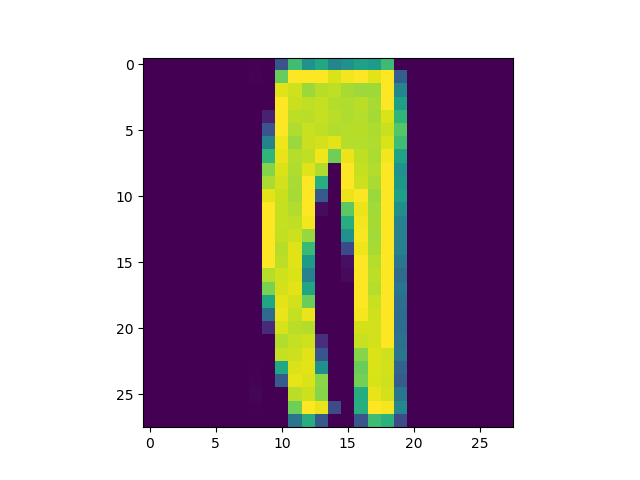

Shirt


In [6]:
#What's in our data?
plt.imshow(test_images[2])
print(fashion_mnist_labels[test_labels[4]])

In [6]:
#Reshape and normalize our images so that they can be fed into a DL Model
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0




# Modeling

In [8]:
#Defining our Model in Keras is Easy! 
model = keras.models.Sequential([
    #1 Convolutional layer to extract data
  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    #1 Pooling Layer to compress the data
  keras.layers.MaxPooling2D(2, 2),
    #Flatten data layer to make it fit
  keras.layers.Flatten(),
    #Then 1 Dense layer that is actually running our inference
  keras.layers.Dense(128, activation='relu'),
    #And then our final layer of outputs, 1 for each of our fashion categories
  keras.layers.Dense(10, activation='softmax')
])

In [9]:
#Let's look at our model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Evaluate the model on test set, even though we haven't trained it, just to see how it does
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.107


<IPython.core.display.Javascript object>


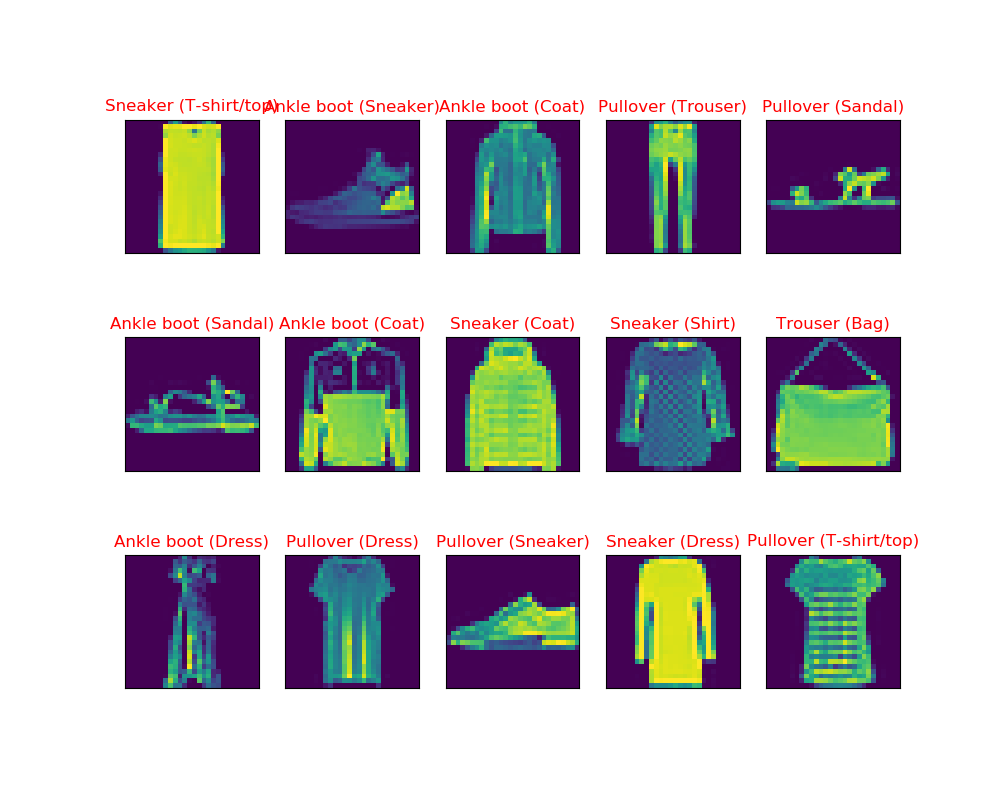

In [11]:
#Let's run our model before training and see how it does
pred_out = model.predict(test_images)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_label = np.argmax(pred_out[index])
    true_label = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_label], 
                                  fashion_mnist_labels[true_label]),
                                  color=("green" if predict_label == true_label else "red"))

# Train our Model

In [46]:
!qsub fashionMNISTjob

36991.v-qsvr-1.aidevcloud


In [62]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
36933.v-qsvr-1             ...ub-singleuser u25945          00:00:27 R jupyterhub     


In [63]:
%ls fashionMNISTjob.*

fashionMNISTjob.e36990  fashionMNISTjob.o36990
fashionMNISTjob.e36991  fashionMNISTjob.o36991


In [65]:
%cat fashionMNISTjob.o*


########################################################################
#      Date:           Thu May  9 11:25:46 PDT 2019
#    Job ID:           36990.v-qsvr-1.aidevcloud
#      User:           u25945
# Resources:           neednodes=1:ppn=2,nodes=1:ppn=2,walltime=06:00:00
########################################################################

* Hello from compute server s001-n021!
* The current directory is /home/u25945/FunwithFashionMNIST.
* Compute server's CPU model and number of logical CPUs:
CPU(s):              24
Model name:          Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz
* Training the FashionMNIST Model

########################################################################
# End of output for job 36990.v-qsvr-1.aidevcloud
# Date: Thu May  9 11:25:48 PDT 2019
########################################################################


########################################################################
#      Date:           Thu May  9 11:28:11 PDT 2019
#    Job I

60000/60000 [==============================] - 31s 511us/step - loss: 0.2002 - acc: 0.9261
Epoch 5/10
60000/60000 [==============================] - 31s 512us/step - loss: 0.1746 - acc: 0.9355
Epoch 6/10
60000/60000 [==============================] - 31s 512us/step - loss: 0.1500 - acc: 0.9447
Epoch 7/10
60000/60000 [==============================] - 31s 514us/step - loss: 0.1297 - acc: 0.9515
Epoch 8/10


60000/60000 [==============================] - 31s 515us/step - loss: 0.1134 - acc: 0.9584
Epoch 9/10
60000/60000 [==============================] - 31s 514us/step - loss: 0.0967 - acc: 0.9638
Epoch 10/10
60000/60000 [==============================] - 31s 513us/step - loss: 0.0843 - acc: 0.9688

########################################################################
# End of output for job 36991.v-qsvr-1.aidevcloud
# Date: Thu May  9 11:33:30 PDT 2019
########################################################################



# Validation of our Model

In [7]:
trained_model = load_model('fashion_model.h5')
# Evaluate the model on test set again after training
score = trained_model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9099


<IPython.core.display.Javascript object>


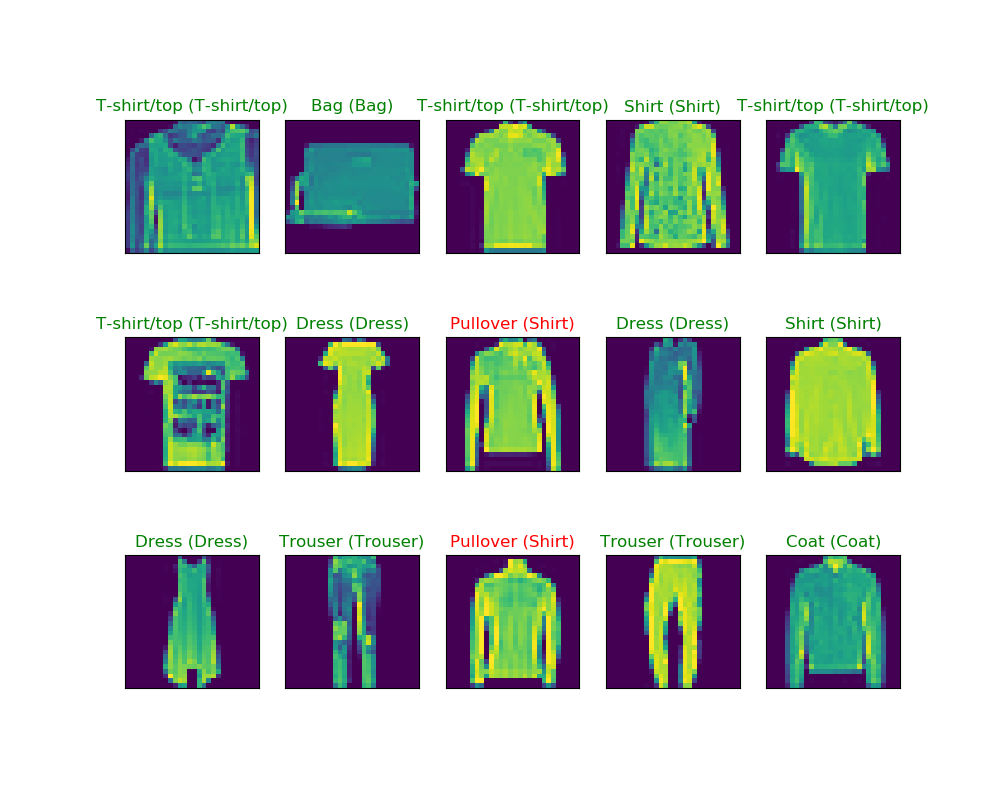

In [14]:
#Now let's see how our model does
pred_out = model.predict(test_images)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_label = np.argmax(pred_out[index])
    true_label = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_label], 
                                  fashion_mnist_labels[true_label]),
                                  color=("green" if predict_label == true_label else "red"))